
# Домашнее задание к лекции "Визуализация данных"
## Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

## Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

# Wine Reviews
## wine reviews with variety, location, winery, price, and description

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 18,6

In [4]:
data = pd.read_csv('winemag-data_first150k.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [11]:
#10 провинций, где сорт винограда набирает наибольшее количество оценок
variety_ = data.groupby('province')[['points']].sum().sort_values('points',ascending=False).head(10)
variety_.style.bar(align='mid',color=['#5fba7d'])

,points
province,
California,3902583
Washington,866577
Tuscany,650077
Bordeaux,546917
Northern Spain,424563
Mendoza Province,408325
Oregon,406169
Burgundy,385519
Piedmont,364544


<AxesSubplot:title={'center':'Points distribution'}>

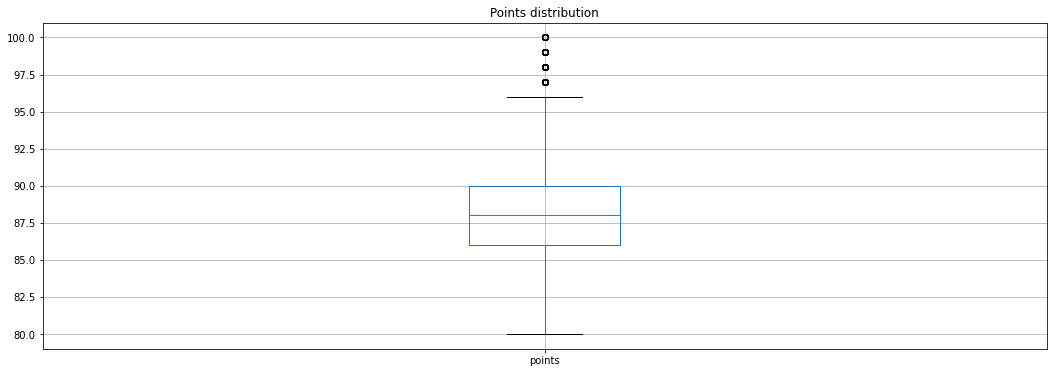

In [18]:
#поиск выбросов по количеству оценок
data.points.plot(kind='box',
                   title='Points distribution',grid=True)

### вывод по ящику с усами:
- имеются верхние выбросы, т.е. оценки выше 96, критики ставят редко.нижние выбросы отсутствуют
- ящик узкий, поэтому часто встречаются оценки, которые сконцентрированы около модального значения
- верхний ус и нижний ус одинаковы, т.е. распределение оценок практически одинаковое

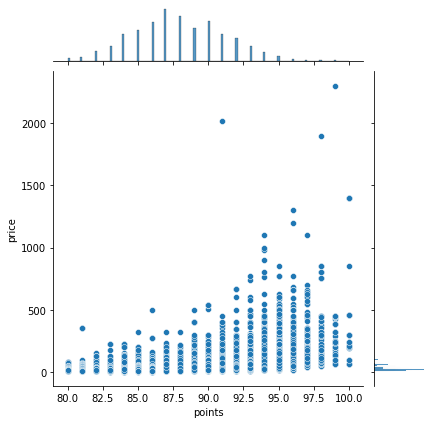

In [25]:
sns.jointplot(x='points', y='price', 
              data=data, kind='scatter')

## на данном графике представлена зависимость цены от оценок критиков и их распределение #

### на гистограмме 'points' представлено распределение оценки критиков:
- критики не ставят оценок ниже 80 и диапозон варьируется в пределе от 80 до 100.
- наибольшее количество оценок выставлено в пределе от 85 до 87.5
- наименьшее количество оценок выставлено в пределе от 95 до 100
- чаще всего критики ставят оценки в районе числа 86
### на гистограмме 'price' представлено распределение цены:
- цена за бутылка вина больше 500 очень редкая
- основной спрос на вино ориентирован на ценовой диапозон от 0 до 250
### на точечной диаграмме представлена взаимосвязь оценок и цены:
- прямая взаимосвязь не наблюдается: в первую очередь клиент обращает внимание на цену вина и уже потом смотрит на оценку критика.скорее всего клиент ориентируется на другие признаки, такие как:место происхождения и сорт винограда.

<AxesSubplot:xlabel='variety', ylabel='points'>

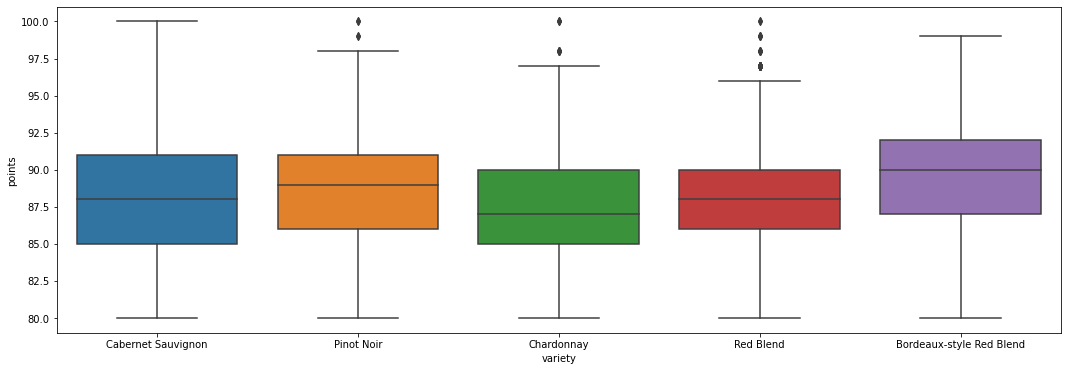

In [5]:
#топ-5 сортов вина  по количеству оценок
top_vine = data.variety.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(x="variety", y="points", 
            data=data[data.variety.isin(top_vine)])

## Вывод по данному графику:
- самой большой разброс оценок наблюдается у Cabernet Sauvignon и Bordeaux-style Red Blend типа вина(большые коробки и усы)
- самая высокая медиана у Bordeaux-style Red Blend
- наблюдаем выбросы для некоторых сортов вина и причем только верхние
- у сорта Red Blend наибольшее количество оценок состредоточено около часто встречающегося значения(потому что узкий ящик),но в то же время наблюдается наибольшее количество выбросов с высокими оценка(т.е. оценки критиков различны, соответственно и "вкусы") ! пожалуй, я бы выбрал этот сорт вина) 
- представленные сорта вина не обладают плохими оценками,т.е. мнения критиков схожи для для данных сортов вина

<AxesSubplot:xlabel='country', ylabel='price'>

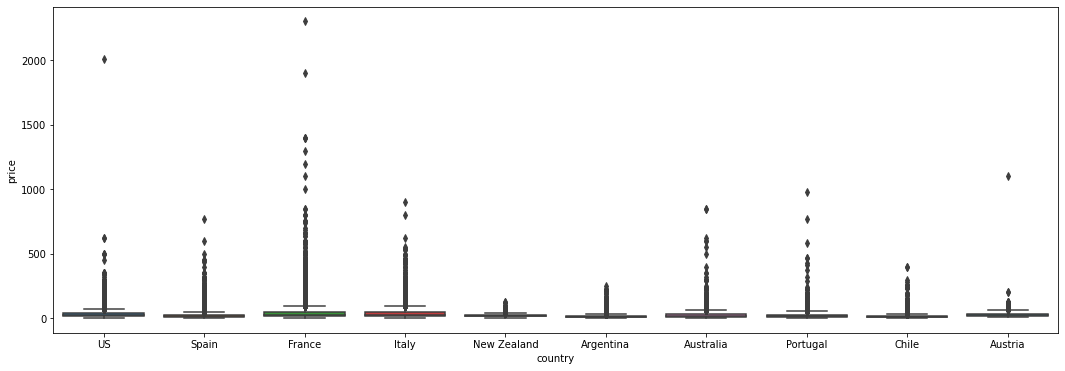

In [17]:
top_price = data.country.value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(x="country", y="price", 
            data=data[data.country.isin(top_price)])

## вывод по данному графику:
- для некоторых стран наблюдаются вина в ценовом диапозоне выше 500 (Франция, Италия,Испания,Португалия), т.е. эти страны поставляют вина и с более высокой стоимостью. а Новая Зеландия и Аргентина поставляют вина с ценой не выше 400.
- наблюдаются огромное количество выбросов по цене для этих стран(кроме Новой Зеландии и Аргентины), т.е. чтобы определить среднюю стоимость бутылки вина для отдельной страны придется тщательно произвести выборку по каждой стране.